In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import scipy.stats as st
import numpy as np
import seaborn as sns

df = pd.read_csv("merge_data/merged_data.csv")
df

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17162,2018,21,111,308000,185086,0.0463,2.5886,0.80,PT01,2,5,1,35,5
17163,2018,51,61,392000,146568,0.0475,1.2506,0.80,PT01,2,5,1,45,5
17164,2018,37,63,292000,107208,0.0463,1.3301,0.80,PT01,1,5,1,39,5
17165,2018,37,147,315200,104844,0.0488,1.7076,0.80,PT01,2,5,1,75,5


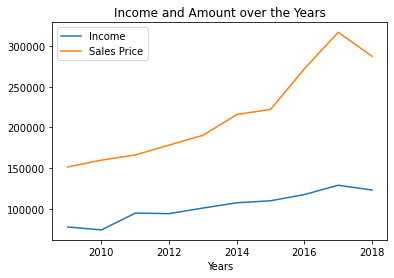

In [2]:
# Create a Graph to represent income vs. price
years_grouped= df.groupby("Year")
x_axis= years_grouped["Year"].unique()
income = years_grouped["Income"].mean()
amount = years_grouped["Amount"].mean()
label= ("Income", "Amount")
#Plot
plt.plot(x_axis, income, label ="Income")
plt.plot(x_axis, amount, label ="Sales Price")
plt.xlabel('Years')
# Set a title of the current axes.
plt.title('Income and Amount over the Years')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

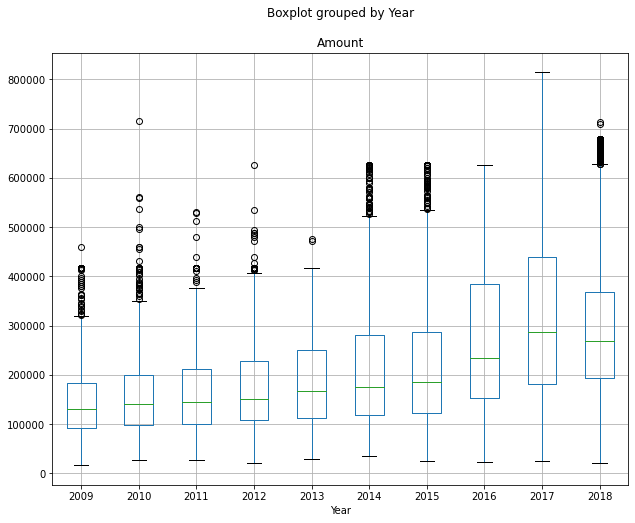

In [3]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['Amount'], by='Year', ax=ax)
plt.show()

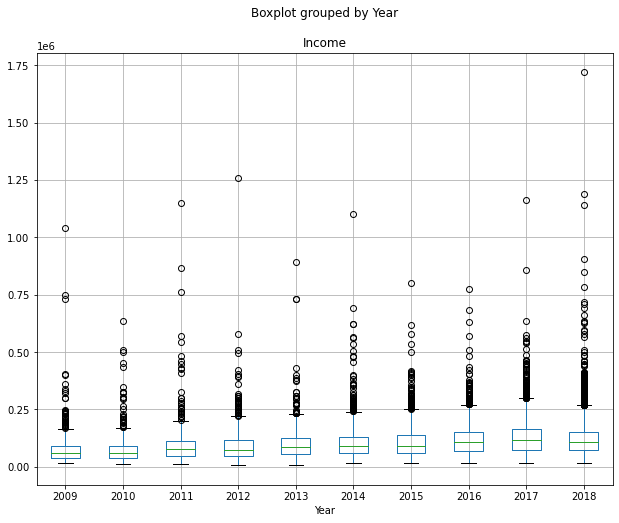

In [4]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['Income'], by='Year', ax=ax)
plt.show()

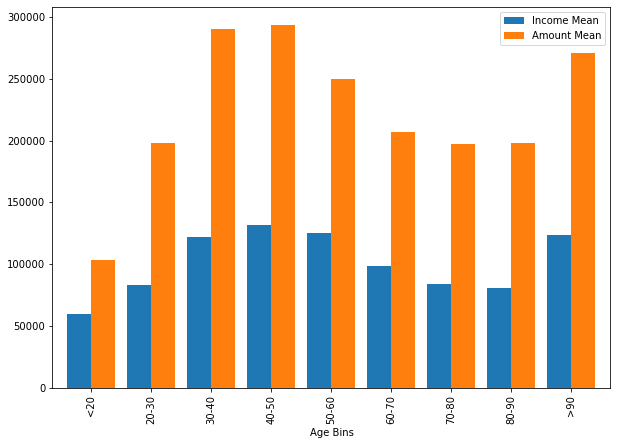

In [5]:
bins = [10,20,30,40,50,60,70,80,90,100]
group_names= ["<20", '20-30', '30-40', '40-50', '50-60','60-70', '70-80', '80-90', '>90']
df["Age Bins"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)

age_group= df.groupby(df["Age Bins"])
age_income= age_group["Income"].mean()
age_amount= age_group["Amount"].mean()

summary_df = pd.DataFrame({"Income Mean": age_income,
                          "Amount Mean": age_amount})
summary_df.plot(kind= "bar", figsize = (10,7) ,rot=90, width=.8)
plt.show()

In [7]:
under_20= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="<20"]
twenties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="20-30"]
thirties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="30-40"]
fordies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="40-50"]
fifties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="50-60"]
sixties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="60-70"]
seventies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="70-80"]
eighties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="80-90"]
nindies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]==">90"]

a= ((under_20["Amount"]/under_20["Income"]).groupby(under_20["Year"])).mean()
a= a.fillna(0)
b= ((twenties["Amount"]/twenties["Income"]).groupby(twenties["Year"])).mean()
c= ((thirties["Amount"]/thirties["Income"]).groupby(thirties["Year"])).mean()
d= ((fordies["Amount"]/fordies["Income"]).groupby(fordies["Year"])).mean()
e= ((fifties["Amount"]/fifties["Income"]).groupby(fifties["Year"])).mean()
f= ((sixties["Amount"]/sixties["Income"]).groupby(sixties["Year"])).mean()
g= ((seventies["Amount"]/seventies["Income"]).groupby(seventies["Year"])).mean()
h= ((eighties["Amount"]/eighties["Income"]).groupby(eighties["Year"])).mean()
i= ((nindies["Amount"]/nindies["Income"]).groupby(nindies["Year"])).mean()


In [8]:
df_means= pd.DataFrame({"<20": a,
                       "20-30": b,
                       "30-40": c,
                       "40-50": d,
                       "50-60": e,
                       "60-70": f,
                       "70-80": g,
                       "80-90": h,
                       ">90": i})
df_means

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,2.085108,2.570360,2.297085,2.180824,1.872166,2.136323,2.872162,3.767292,2.355288
2010,2.796736,2.514651,2.588421,2.420604,2.239691,2.420623,2.562901,3.200739,2.443613
2011,2.551897,2.393448,2.208496,1.937974,1.824605,1.843899,2.432917,1.765701,2.612647
2012,2.773013,2.513409,2.281882,2.213312,1.749175,2.315563,2.262990,1.674095,2.817641
2013,0.769270,2.374069,2.242762,2.112627,1.873119,1.818955,2.719933,2.900277,2.286926
2014,NaN,2.331111,2.276418,2.252041,1.883523,1.828505,2.092567,2.679044,2.627142
2015,1.792707,2.288320,2.320974,2.141850,1.994520,2.089958,2.419338,2.052886,2.468399
2016,3.063664,2.558325,2.649723,2.478179,2.245465,2.210629,2.376145,3.087581,2.205630
2017,2.005984,2.801855,2.758020,2.702420,2.468065,2.524139,2.447201,4.061639,2.450005


In [9]:
df_means.fillna(0)

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,2.085108,2.570360,2.297085,2.180824,1.872166,2.136323,2.872162,3.767292,2.355288
2010,2.796736,2.514651,2.588421,2.420604,2.239691,2.420623,2.562901,3.200739,2.443613
2011,2.551897,2.393448,2.208496,1.937974,1.824605,1.843899,2.432917,1.765701,2.612647
2012,2.773013,2.513409,2.281882,2.213312,1.749175,2.315563,2.262990,1.674095,2.817641
2013,0.769270,2.374069,2.242762,2.112627,1.873119,1.818955,2.719933,2.900277,2.286926
2014,0.000000,2.331111,2.276418,2.252041,1.883523,1.828505,2.092567,2.679044,2.627142
2015,1.792707,2.288320,2.320974,2.141850,1.994520,2.089958,2.419338,2.052886,2.468399
2016,3.063664,2.558325,2.649723,2.478179,2.245465,2.210629,2.376145,3.087581,2.205630
2017,2.005984,2.801855,2.758020,2.702420,2.468065,2.524139,2.447201,4.061639,2.450005


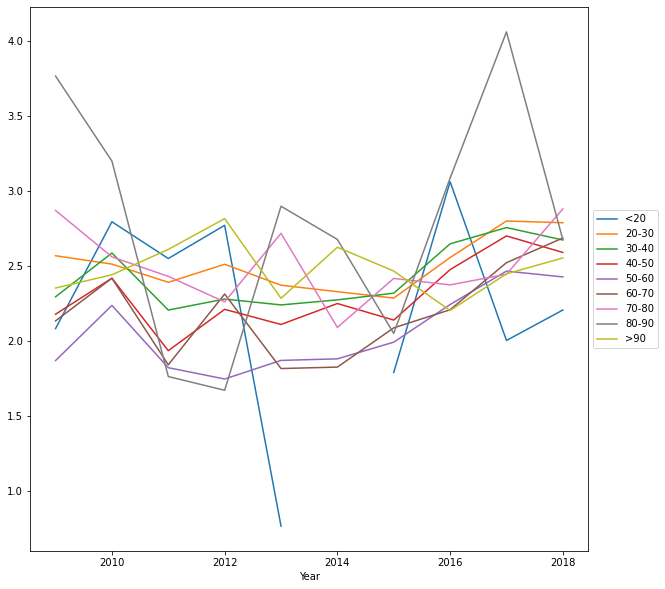

In [18]:
df_means.plot(kind="line", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [15]:
under_20= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="<20"]
twenties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="20-30"]
thirties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="30-40"]
fordies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="40-50"]
fifties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="50-60"]
sixties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="60-70"]
seventies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="70-80"]
eighties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="80-90"]
nindies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]==">90"]

a= ((under_20["Amount"]/under_20["Income"]).groupby(under_20["Year"])).median()
b= ((twenties["Amount"]/twenties["Income"]).groupby(twenties["Year"])).median()
c= ((thirties["Amount"]/thirties["Income"]).groupby(thirties["Year"])).median()
d= ((fordies["Amount"]/fordies["Income"]).groupby(fordies["Year"])).median()
e= ((fifties["Amount"]/fifties["Income"]).groupby(fifties["Year"])).median()
f= ((sixties["Amount"]/sixties["Income"]).groupby(sixties["Year"])).median()
g= ((seventies["Amount"]/seventies["Income"]).groupby(seventies["Year"])).median()
h= ((eighties["Amount"]/eighties["Income"]).groupby(eighties["Year"])).median()
i= ((nindies["Amount"]/nindies["Income"]).groupby(nindies["Year"])).median()

df_medians= pd.DataFrame({"<20": a,
                       "20-30": b,
                       "30-40": c,
                       "40-50": d,
                       "50-60": e,
                       "60-70": f,
                       "70-80": g,
                       "80-90": h,
                       ">90": i})
df_medians.fillna(0)

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,1.727013,2.500000,2.285714,2.005268,1.714002,2.094854,2.775319,3.767292,2.424308
2010,2.796736,2.409048,2.468211,2.374124,2.204481,2.356902,3.029823,3.200739,2.660126
2011,2.551897,2.430883,2.133131,1.893390,1.735515,1.431221,2.671884,1.765701,2.178745
2012,2.773013,2.480730,2.120403,2.147215,1.600694,2.271336,2.260789,1.428139,2.773663
2013,0.769270,2.325381,2.164074,1.966263,1.759761,1.786994,2.608441,2.900277,2.295945
2014,0.000000,2.228571,2.179231,2.128536,1.696257,1.768269,1.879195,2.973356,2.679384
2015,1.792707,2.203623,2.213777,2.056105,1.810341,1.941050,2.223995,2.322557,2.569781
2016,3.063664,2.395509,2.483905,2.348485,2.106886,2.014852,2.381081,2.739756,2.063350
2017,2.047943,2.698114,2.627535,2.552559,2.328227,2.370107,2.437689,3.695741,2.310371


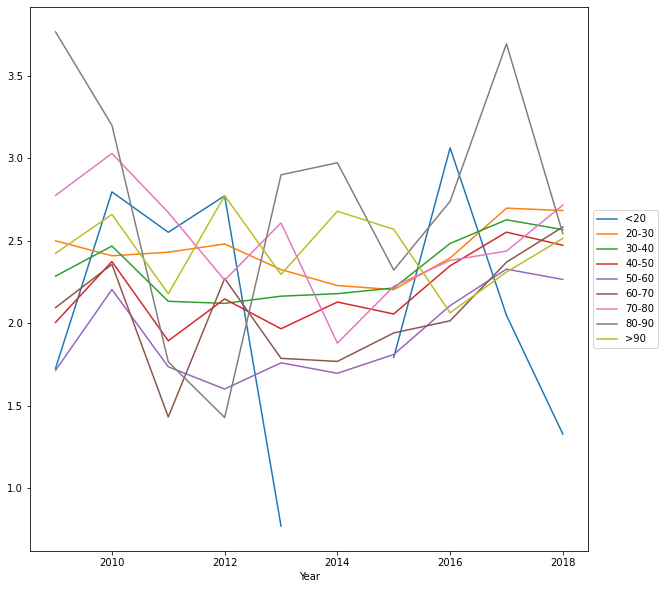

In [16]:
df_medians.plot(kind="line", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [21]:
under_20= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="<20"]
twenties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="20-30"]
thirties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="30-40"]
fordies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="40-50"]
fifties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="50-60"]
sixties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="60-70"]
seventies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="70-80"]
eighties= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]=="80-90"]
nindies= df[["Age Bins", "Income", "Amount", "Year"]].loc[df["Age Bins"]==">90"]

a= ((under_20["Amount"]).groupby(under_20["Year"])).median()
b= ((twenties["Amount"]).groupby(twenties["Year"])).median()
c= ((thirties["Amount"]).groupby(thirties["Year"])).median()
d= ((fordies["Amount"]).groupby(fordies["Year"])).median()
e= ((fifties["Amount"]).groupby(fifties["Year"])).median()
f= ((sixties["Amount"]).groupby(sixties["Year"])).median()
g= ((seventies["Amount"]).groupby(seventies["Year"])).median()
h= ((eighties["Amount"]).groupby(eighties["Year"])).median()
i= ((nindies["Amount"]).groupby(nindies["Year"])).median()

df_amount_medians= pd.DataFrame({"<20": a,
                       "20-30": b,
                       "30-40": c,
                       "40-50": d,
                       "50-60": e,
                       "60-70": f,
                       "70-80": g,
                       "80-90": h,
                       ">90": i})
df_amount_medians.fillna(0)

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,78061.0,115931.0,162011,157102,122800,100000.0,136000,80718.0,184000.0
2010,98188.0,119803.5,160910,156887,136000,125767.0,115000,101117.5,157874.0
2011,83937.0,128115.5,191800,141462,139200,135500.0,122500,152200.0,150048.0
2012,81051.0,128000.0,190000,203701,134809,143000.0,81200,142000.0,159065.0
2013,58913.0,142800.0,207600,208000,175000,119787.5,132000,80500.0,189477.5
2014,0.0,135714.0,211300,208000,160000,111600.0,96000,103500.0,328500.0
2015,74875.0,142200.0,216900,224000,166200,140000.0,151000,130000.0,427500.0
2016,165300.0,172500.0,252950,278800,242625,162500.0,161300,186250.0,193250.0
2017,72636.5,208080.0,340000,343978,262617,217450.0,205000,332000.0,234400.0


In [22]:
a= ((under_20["Income"]).groupby(under_20["Year"])).median()
b= ((twenties["Income"]).groupby(twenties["Year"])).median()
c= ((thirties["Income"]).groupby(thirties["Year"])).median()
d= ((fordies["Income"]).groupby(fordies["Year"])).median()
e= ((fifties["Income"]).groupby(fifties["Year"])).median()
f= ((sixties["Income"]).groupby(sixties["Year"])).median()
g= ((seventies["Income"]).groupby(seventies["Year"])).median()
h= ((eighties["Income"]).groupby(eighties["Year"])).median()
i= ((nindies["Income"]).groupby(nindies["Year"])).median()
df_income_medians= pd.DataFrame({"<20": a,
                       "20-30": b,
                       "30-40": c,
                       "40-50": d,
                       "50-60": e,
                       "60-70": f,
                       "70-80": g,
                       "80-90": h,
                       ">90": i})
df_income_medians.fillna(0)

,<20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,>90
Year,,,,,,,,,
2009,45200.0,44712.0,72247.0,76257.5,69110,53472.0,69199.0,21426.0,113916.0
2010,36294.0,48901.5,64053.5,67716.0,75252,57756.0,52956.0,32042.5,60072.0
2011,32892.0,54106.0,90444.0,90158.5,85000,80729.0,48495.5,87866.0,71321.5
2012,30270.0,50411.0,91576.5,102924.0,84816,64027.0,47496.0,59886.0,53794.0
2013,76583.0,63340.0,96700.0,102108.0,98279,72920.0,50640.0,27365.5,92753.5
2014,0.0,64488.0,100796.5,101916.0,95000,69139.5,50213.0,43049.0,117000.0
2015,41474.5,67300.0,97608.0,114384.0,101094,71123.0,64320.0,117253.0,133536.0
2016,53955.0,77002.0,109992.0,124609.0,122322,86040.0,74221.5,61278.0,104791.5
2017,29796.0,81533.0,124774.5,129960.0,121053,92614.0,82194.0,65648.0,90000.0


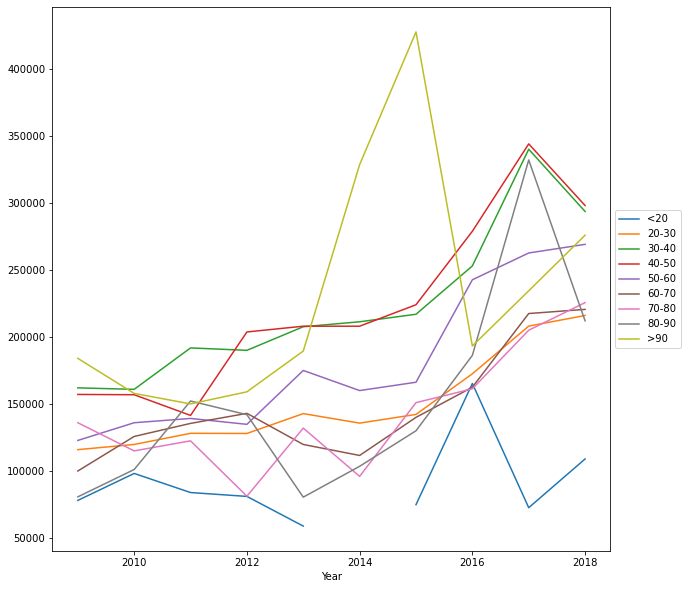

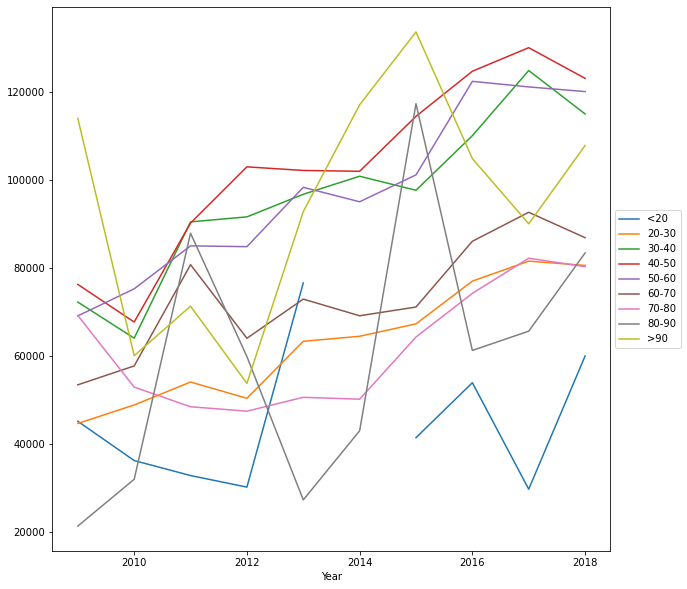

In [23]:
df_amount_medians.plot(kind="line", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
df_income_medians.plot(kind="line", figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()